Author: Ahmed Sobhi

Creation_date: 16th June 2023

Objective: Data EDA.

## Importing Required libararies and packages

In [34]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# Used for visulization
import matplotlib.pyplot as plt
import seaborn as sns

# For iteration visulization purpose
from tqdm import tqdm

## Required Functions

In [35]:
def plot_timeseries_trend(df:pd.DataFrame, timestamp_col:str, target_col:str, groupby_lst:list, fig_title:str='', save:bool=False)->None:
    """
        Plot price trend per input selected feature

        Input:
            df: pandas DataFrame, input dataset.
            timestamp_col: str, timestamp feature which will be x-axis.
            target_col: str, target featuers, which will be y-axis
            groupby_col: list, features which the dataset will be grouped by.
            fig_title: str, title of the plot
            save: boolean, indicate whether save or not to save the plot.

        Output:
            None.
    """

    # Create a copy of input dataframe
    _df = df.copy()

    # Group the data by category
    grouped_data = _df.sort_values(timestamp_col, ascending=True).groupby(groupby_lst)

    # Determine the number of categories
    num_categories = len(grouped_data)

    # Calculate the number of rows and columns for subplots
    num_rows = int(num_categories / 2) + num_categories % 2
    num_cols = 2

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    # Flatten the axes array to easily iterate through subplots
    axes = axes.flatten()

    # Plotting the trend for each category
    for i, (category, group) in enumerate(grouped_data):
        ax = axes[i]  # Select the appropriate subplot
        ax.plot(group[timestamp_col], group[target_col])
        ax.set_title(category)
        ax.set_xlabel('Time')
        ax.set_ylabel(target_col)

    # Hide empty subplots if necessary
    if num_categories < num_rows * num_cols:
        for j in range(num_categories, num_rows * num_cols):
            fig.delaxes(axes[j])
    
    plt.suptitle(fig_title)
    plt.tight_layout()  # Adjust the spacing between subplots
    
    if save==True:
        plt.savefig(f'../report/plots/{fig_title.replace(" ", "_")}.jpg')
    
    plt.show()

    return None


## Loading Dataset

In [36]:
# Loading dataset
df = (
    pd.read_csv('../data/intermid/DS-task-data-cleaned.csv')
    .assign(
        priced_at= lambda x: pd.to_datetime(x.priced_at)
    )
)

# Load extra_features dataset
df_extrafeatures = pd.read_csv('../data/intermid/features_ohe.csv')

# Display first 5 rows
display(df.head(3))

display(df_extrafeatures.head(3))

,id,make,model,model_year,kilometers,transmission_type,price,priced_at,mileage_category,extra_features_count
0,17786,Nissan,Juke,2008,200000.0,Automatic,115000,2022-02-11,200k+,26
1,9997,Nissan,Juke,2008,200000.0,Automatic,116000,2022-04-21,200k+,26
2,8738,Nissan,Juke,2009,19999.0,Automatic,239000,2022-06-01,0-50k,26


,id,extra_features_lst,extra_features_count,abs,airbags,airconditioning,alarm,alarm/anti-theftsystem,alloywheels,am/fmradio,...,sensors,sideairbag,startengine,steptronic,sunroof,tintedglass,touchactivateddoorlock,touchscreen,tractioncontrol,usb
0,0,['aux' 'abs' 'analogeaircondition' 'powermirro...,6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,['abs' 'airconditioning' 'airbags' 'alarm/anti...,8,1,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,['aux' 'abs' 'analogeaircondition' 'powermirro...,6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Display dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18560 entries, 0 to 18559
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    18560 non-null  int64         
 1   make                  18560 non-null  object        
 2   model                 18560 non-null  object        
 3   model_year            18560 non-null  int64         
 4   kilometers            18560 non-null  float64       
 5   transmission_type     18560 non-null  object        
 6   price                 18560 non-null  int64         
 7   priced_at             18560 non-null  datetime64[ns]
 8   mileage_category      18560 non-null  object        
 9   extra_features_count  18560 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 1.4+ MB


In [38]:
# display dataframe statics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18560.0,10025.873761,5797.828096,0.0,5017.75,10021.5,15013.25,20097.0
model_year,18560.0,2016.372845,4.330355,1999.0,2014.00,2017.0,2020.00,2023.0
kilometers,18560.0,94310.144989,59968.258248,0.0,41675.00,90000.0,139999.00,285000.0
price,18560.0,274881.196121,128976.204012,1000.0,181000.00,248000.0,338000.00,1384000.0
extra_features_count,18560.0,12.453233,7.795204,1.0,6.00,9.0,18.00,39.0


## Univariate EDA
- Analysis the distribution of each feature in dataset.

### Numerical Features

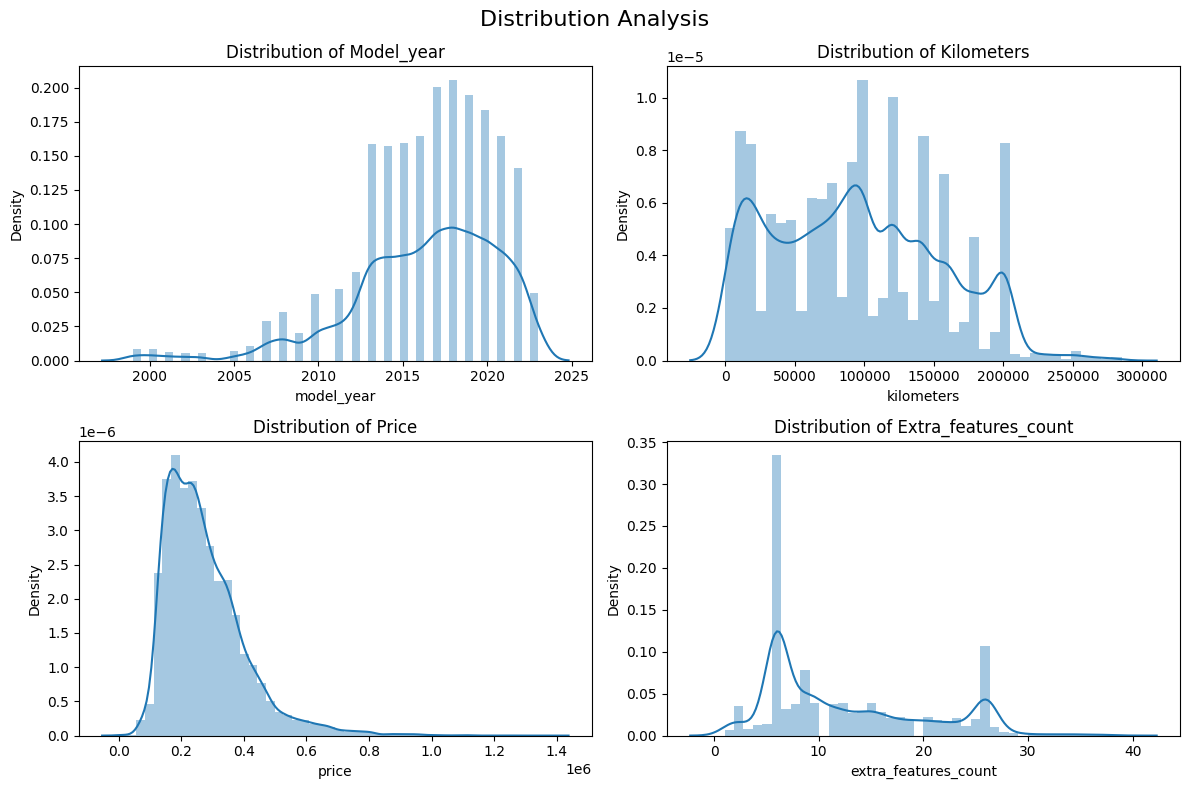

In [39]:
# Used to look at the distribution of a numerical variables
features_numeric = df.drop('id', axis=1).select_dtypes('number').columns.tolist()

# Calculate the number of rows and columns for subplots
num_rows = int(len(features_numeric) / 2) + len(features_numeric) % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Iterate over features and plot distplot on subplots
for i, feature in enumerate(features_numeric):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.distplot(df[feature], ax=ax)
    ax.set_title(f'Distribution of {feature.capitalize()}')

# Remove empty subplots if necessary
if len(features_numeric) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, num_cols - 1])

# Set title for the whole plot
fig.suptitle('Distribution Analysis', fontsize=16)
plt.tight_layout()
plt.savefig('../report/plots/numerical_distribution.jpg')
plt.show()

In [40]:
df[features_numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,18560.0,2016.372845,4.330355,1999.0,2014.0,2017.0,2020.0,2023.0
kilometers,18560.0,94310.144989,59968.258248,0.0,41675.0,90000.0,139999.0,285000.0
price,18560.0,274881.196121,128976.204012,1000.0,181000.0,248000.0,338000.0,1384000.0
extra_features_count,18560.0,12.453233,7.795204,1.0,6.0,9.0,18.0,39.0


Insights from this Dataset:
- There are skewness in {price, model_year, extra_features_count} features.
- The central tendency of extra_features are centered around [6-18], which means most of used cars have number of extra_features ranges from [6 - 18] features.
- The central tendency of model_year feature are centered around [2014 - 2020], which means most of used cars models are for years from [2014 - 2020].

### Categorical and binary features

#### What is the most common car model?

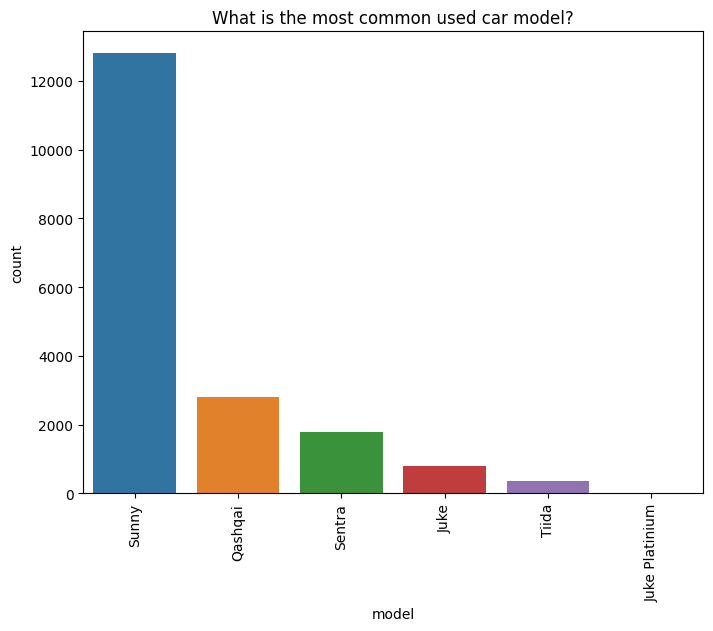

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='model', order=df.model.value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.title('What is the most common used car model?')
plt.savefig('../report/plots/model_countplot.jpg')
plt.show()

Insights:
- The most common used car model is Sunny, and the least common model is Juke Platinium.
- Assumption that, Due to price range difference between models, That affects number of acquisition of certain model rather than other, So Juke Platinium should be the most significantly high price in all the models, so the compnay does not invest in frequently compared to other models.

### What is the most driven mileage in kilometers by used cars?

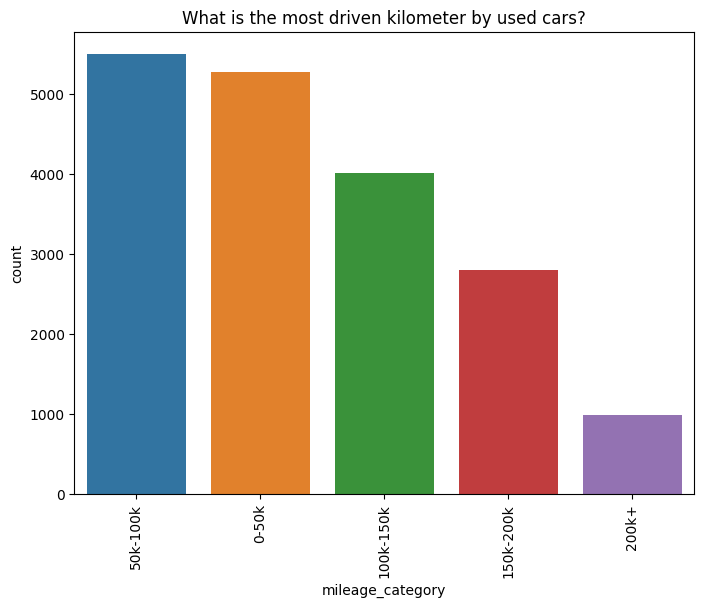

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='mileage_category', order=df.mileage_category.value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.title('What is the most driven kilometer by used cars?')
plt.savefig('../report/plots/mileage_category_countplot.jpg')
plt.show()

Insights:
- Most of the cars we have, have driven around 0-150K.
- It is recommended that Most of sold used cars should be driven for around 0-150K.

#### What are the most common extra features in each car?

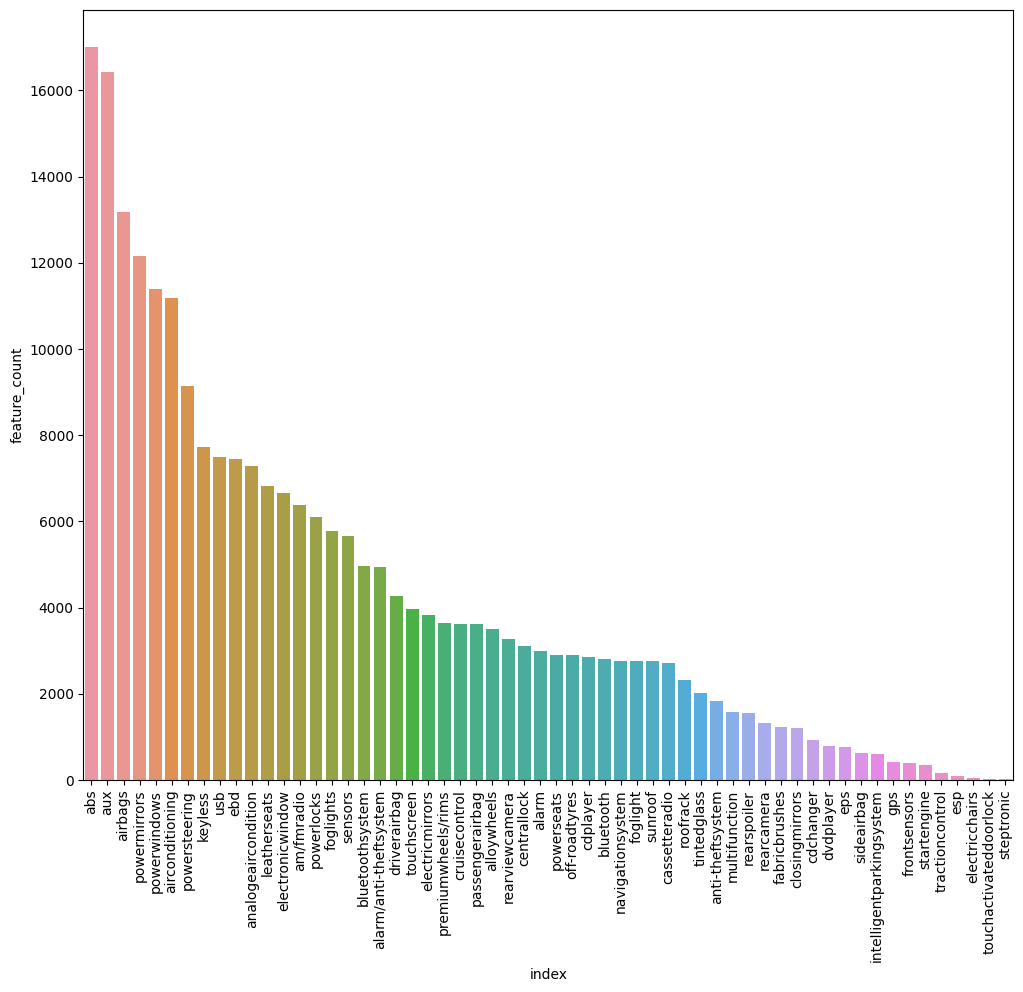

In [43]:
# What are the most common extra features in each car.
df_features_count = (
    df_extrafeatures
    .drop(['id', 'extra_features_lst', 'extra_features_count'], axis=1)
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='feature_count')
)

plt.figure(figsize=(12, 10))
sns.barplot(data=df_features_count, x='index', y='feature_count')
plt.xticks(rotation=90)
plt.savefig('../report/plots/features_countplot.jpg')
plt.show()

In [44]:
# Top ten most common features:
top_ten_common_features = df_features_count.head(10)['index'].values.tolist()
print(f'Top Ten Most Common Car Features:{top_ten_common_features}')

Top Ten Most Common Car Features:['abs', 'aux', 'airbags', 'powermirrors', 'powerwindows', 'airconditioning', 'powersteering', 'keyless', 'usb', 'ebd']


## Multivariate Analysis

### What is the frequency of models of used car over transmission types?

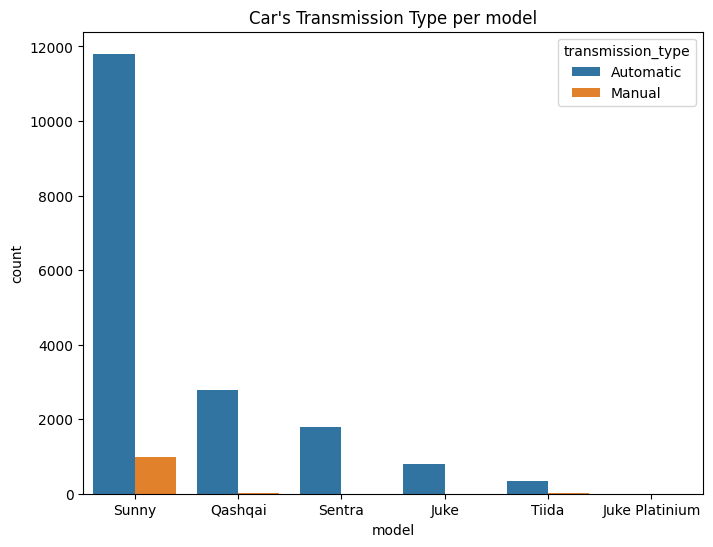

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='model', hue='transmission_type', order=df.model.value_counts(ascending=False).index)
plt.title("Car's Transmission Type per model")
plt.savefig('../report/plots/tranmission_per_model_countplot.jpg')
plt.show()

Insights:
- Most of the manual cars belongs to car model Sunny.
- As in this dataset, we have little number of Manual transmission_type.
- This will have some biasing while estimating the used car price in the machine learning or statistical model.

## Which model has the highest different model manufacturing years?
- This should tell us which model, the company is foucused on compared to others.

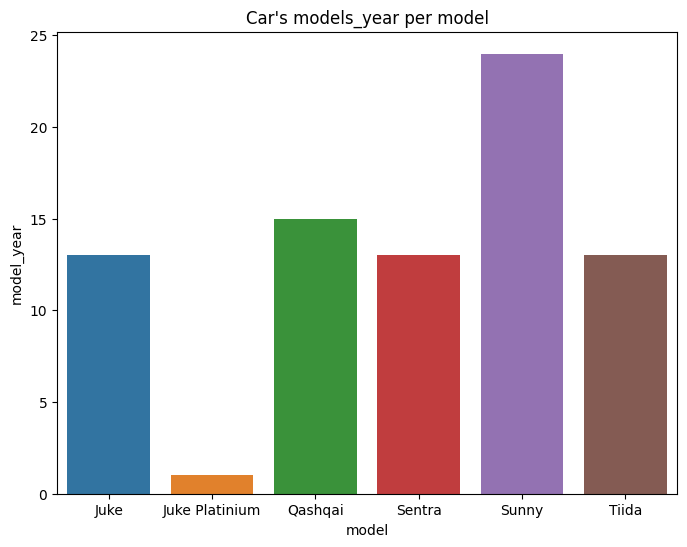

In [46]:
plt.figure(figsize=(8, 6))
df_model_year_count = df.groupby('model')['model_year'].nunique().reset_index(name='model_year')
sns.barplot(data=df_model_year_count, x='model', y='model_year')
plt.title("Car's models_year per model")
plt.savefig('../report/plots/modelyear_per_model_barplot.jpg')
plt.show()

Insights:
- Model Sunny, has the highest different model years in our data, which indicates that Sunny has a long history in the market compared to others models.
- In the opposite side, model Juke Platinium has the lowest model years.

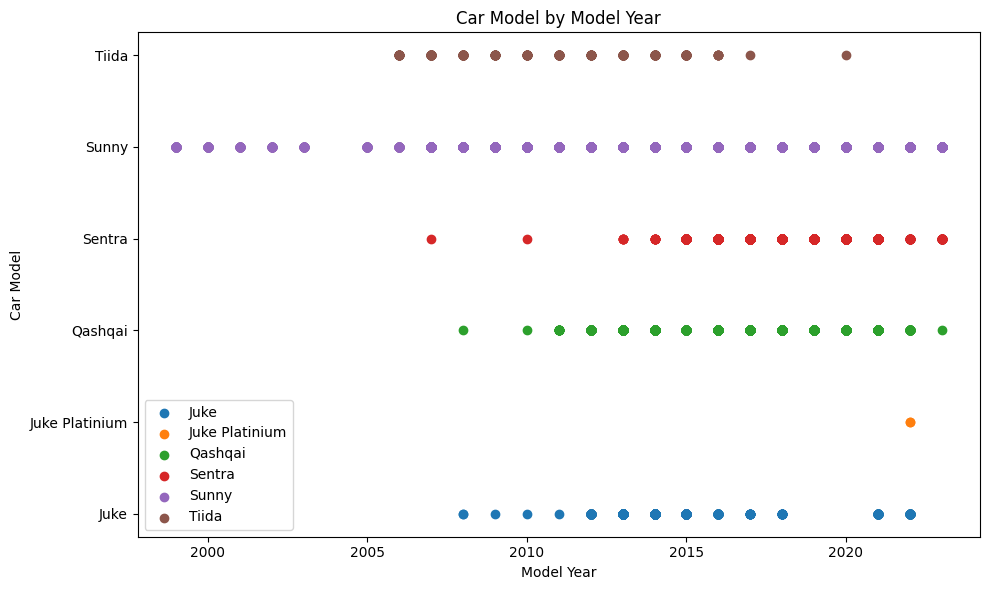

In [47]:
# Group the dataset by car model
grouped_data = df.groupby('model')

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot line plots for each car model
for model, group in grouped_data:
    ax.scatter(group['model_year'], [model] * len(group), label=model)

# Set y-axis label
ax.set_ylabel('Car Model')
# Set x-axis label
ax.set_xlabel('Model Year')
# Set plot title
ax.set_title('Car Model by Model Year')
# Display a legend
ax.legend()
# Adjust the layout
plt.tight_layout()
# Display the plot
plt.show()

Insights:
- The most purchased models over history is Sunny.
- For [Tiida, Qashqai, Juke] models, they started to get into the market at early 20th, Compared to [Sentra, Juke Platinium] models which joined the market at later years.

### Does Transmission type has effect on price?

<Axes: xlabel='priced_at', ylabel='price'>

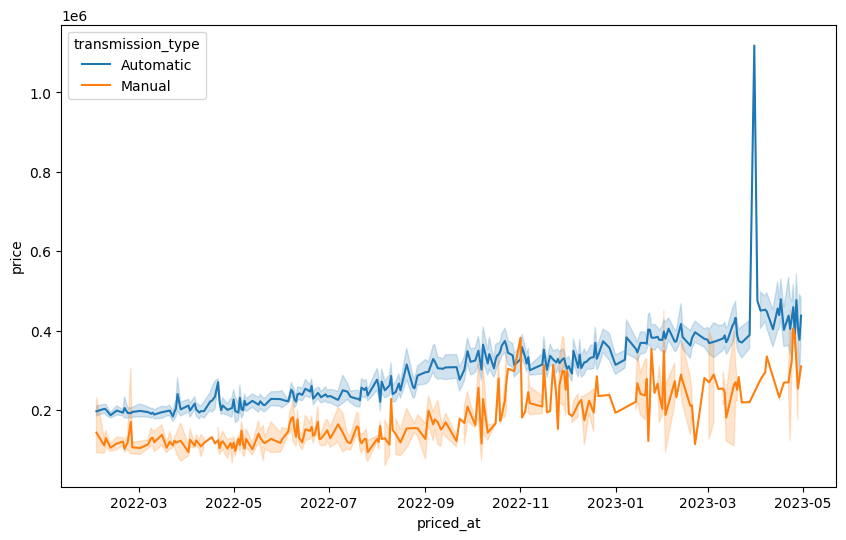

In [48]:
plt.figure(figsize=(10, 6))  # Set the desired figure size

# Does Transmission_type has effect on price?
fig = sns.lineplot(data=df, x='priced_at', y='price', hue='transmission_type')

# Save figure
#fig.get_figure().savefig('../report/plots/price_distribution_over_transmission_type.jpg')

fig

Insights:
- There are different between prices for manual vs automatic cars.
- This will have impact in estimating the used cars price.
- Although we have small amount of data regarding manual transmission type.

### How is the price trend accros other features?

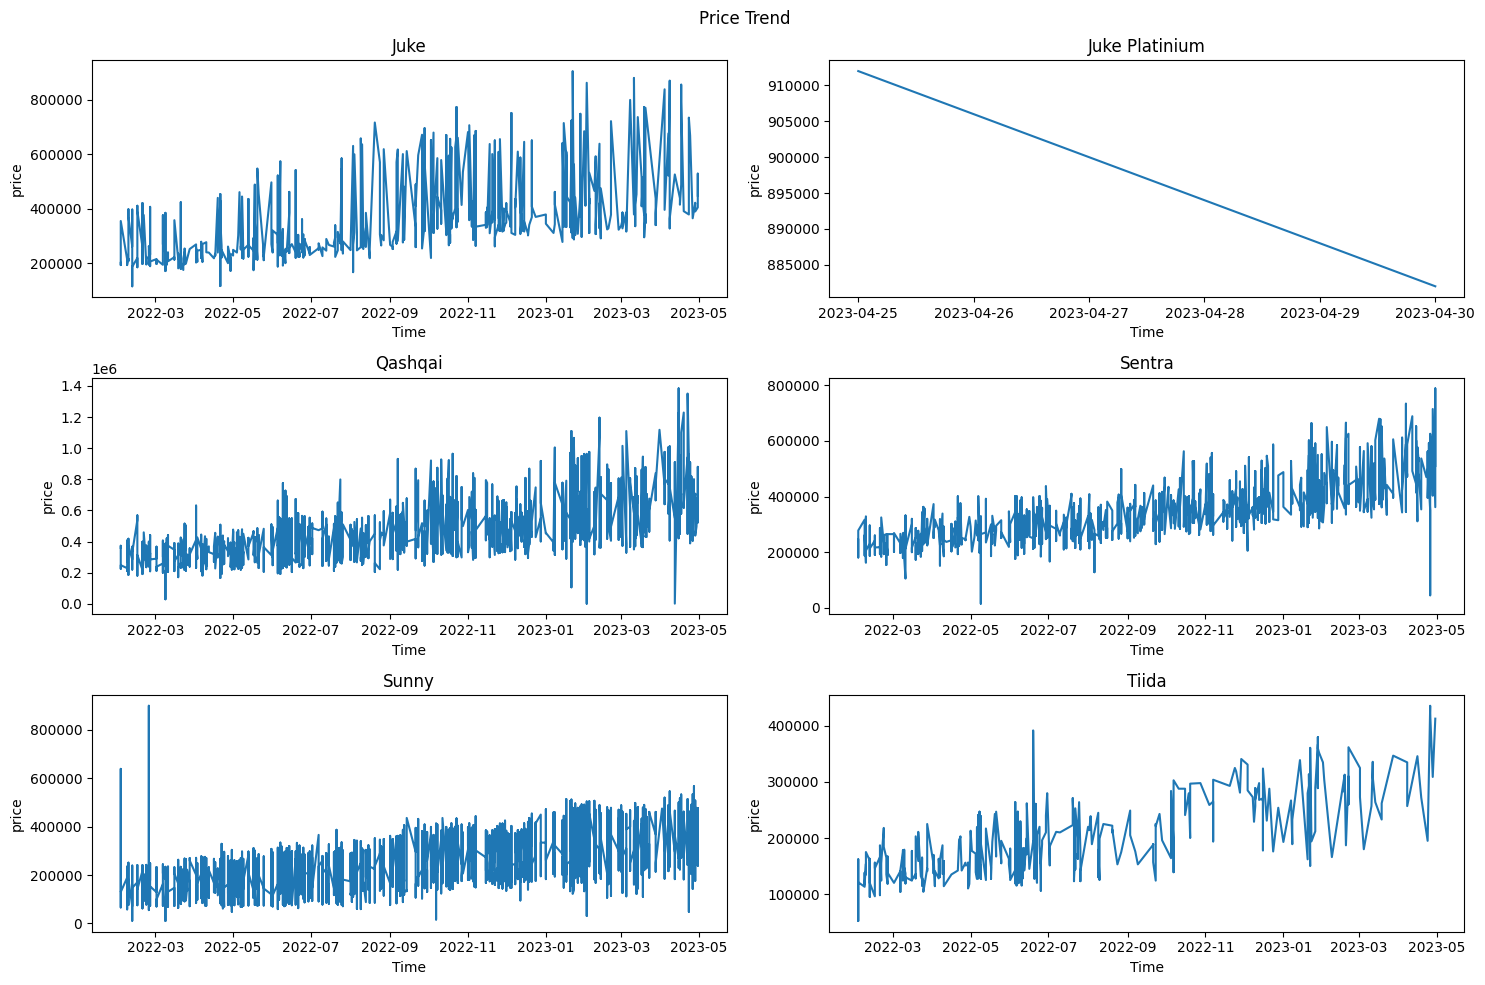

In [49]:
plot_timeseries_trend(
    df=df,
    timestamp_col='priced_at',
    target_col='price',
    groupby_lst=['model'],
    fig_title='Price Trend',
    save=False
)

Insights:
- There is a trend in the price over each used car model.
- There are a lot of noise in the price data.

### How does the price vary based on different car features such as car model, manufacturing year, and kilometers driven?

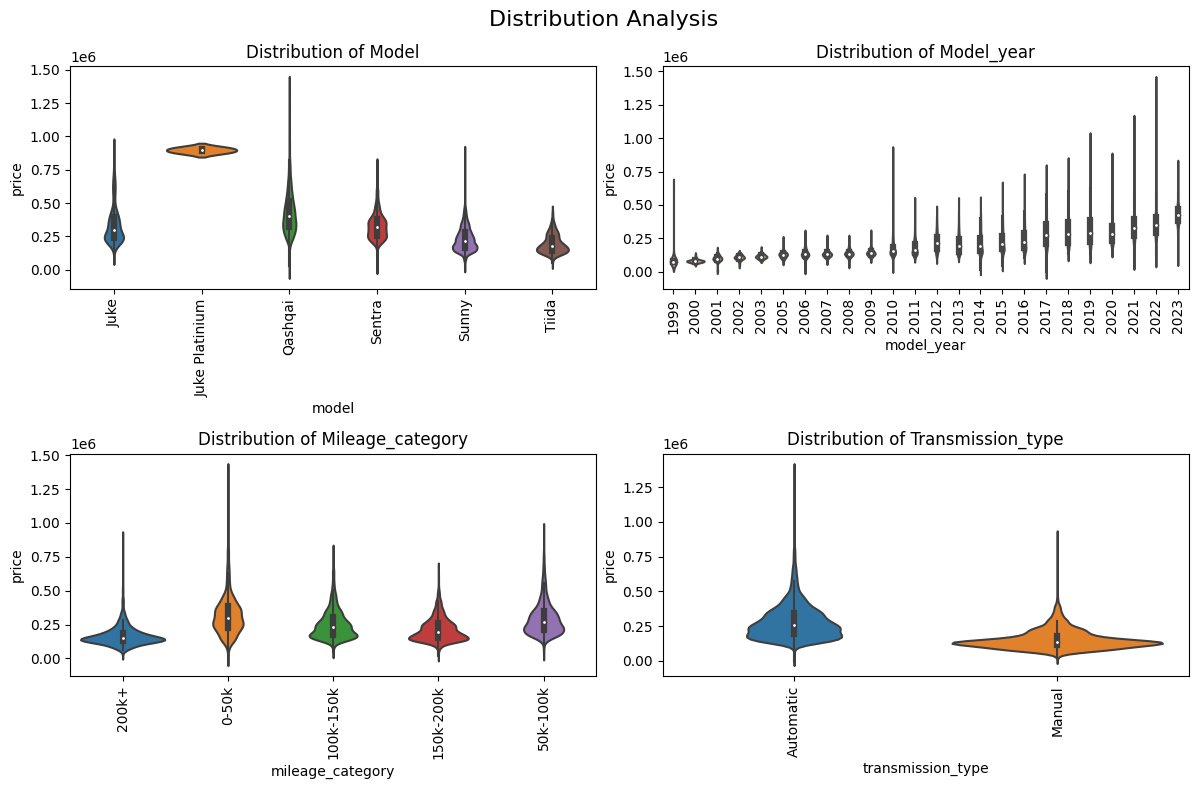

In [50]:
# Used to look at the distribution of a numerical variables
features_lst = ['model', 'model_year', 'mileage_category', 'transmission_type'] 

# Calculate the number of rows and columns for subplots
num_rows = int(len(features_lst) / 2) + len(features_lst) % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Iterate over features and plot distplot on subplots
for i, feature in enumerate(features_lst):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.violinplot(data=df, x=feature, y='price', ax=ax)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.tick_params(axis='x', rotation=90)

# Remove empty subplots if necessary
if len(features_numeric) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, num_cols - 1])

# Set title for the whole plot
fig.suptitle('Distribution Analysis', fontsize=16)
plt.tight_layout()
#plt.savefig('../report/plots/numerical_distribution.jpg')
plt.show()

To understand Violin plot, there are some aspects to consider:
| Aspect | Description|
|--------|------------|
|Distribution of Data| The width of the violin plot represents the density of data points at different price level. <br/>A wider section indicates a higher concentration of data points, which a narrower section indicates a lower concentration.|
|Median| The white dot within the violin plot represents the median value of the data distribution. <br/>It provides an estimate of the central tendency of the data.|
|Interquartile Range (IQR)| The box inside the violin plot represents the interquartile range, which spans from the 25th precentile (lower quartile) to the 75th precentile (upper quartile) of the data. <br/>It provides information about the spread and variability of the data.|
|Whiskers| The thin lines extending from the box (IQR) represents the data range within a certain threshould of the IQR. <br/>They typically cover a certain percentage of the data, such as 1.5 times the IQR. <br/>Any data points outside the whiskers are considered outliers.|
|Symmetry| The shape of the violin plot can provide insights into the symmetry or skewness of the data distribution. <br/>A symmetric distribution will have similar shapes on both sides of the median, while a skewed distribution will have a longer tail on one side.|

Insights: Using Violin plot tell us the following:
- From distribution of price over car model:
    - The width of each violin indicates the density of prices for a particular price. A narrorw section in the violin plot like in [Juke, Sunny, Qashqia, Sentra], indicates a more dispersed pricing pattern. A wider section in the violin plot like in [Juke Platinium, Tiida] indicate a high concentration of sales within a specific price range.
    - The whitedot in the violin plots indicates the median price value for each car model, which give idea of typical price range. So all models  have similar range of prices, except for "Juke Platinium" has a significantly higher price.
- From distribution of price over car model:
    - The whitedot indicates that, the median price value per each model_year is following a rising trend over each new year.
- From distribution of price over car transmission type:
    - The Price in Manual transmission type used cars is concetrated in a small specific price range, relatively to Automatic transmission type, Which explains the wider & narrow width in the violin plot in both transmission types.

From All these insights, they can guide our pricing strategies, We can determine which car models command higher prices due to their perceived value, understand the range of prices that customers are willing to pay for different models, and identify any outliers in the prices.

## Feature Engineering

### Car Age
- Describe the Age of car at the time of pricing.

In [51]:
# Car age at time the price was placed
df['model_age'] = df['priced_at'].dt.year - df['model_year']

# Dispaly head of df
df.head()

,id,make,model,model_year,kilometers,transmission_type,price,priced_at,mileage_category,extra_features_count,model_age
0,17786,Nissan,Juke,2008,200000.0,Automatic,115000,2022-02-11,200k+,26,14
1,9997,Nissan,Juke,2008,200000.0,Automatic,116000,2022-04-21,200k+,26,14
2,8738,Nissan,Juke,2009,19999.0,Automatic,239000,2022-06-01,0-50k,26,13
3,9477,Nissan,Juke,2010,115000.0,Automatic,195000,2022-02-07,100k-150k,26,12
4,12801,Nissan,Juke,2011,19279.0,Automatic,248000,2022-06-29,0-50k,7,11


### Price Moving Average.

In [52]:
# Price Moving Average
window_size = 5

df['price_moving_avg'] = (
    df.groupby('model')['price']
    .apply(
        lambda x: x.shift().rolling(window=window_size, min_periods=1).mean()
        )
    .fillna(method='bfill')
    .astype(int)
)

# Display head of dataframe
df.head()

,id,make,model,model_year,kilometers,transmission_type,price,priced_at,mileage_category,extra_features_count,model_age,price_moving_avg
0,17786,Nissan,Juke,2008,200000.0,Automatic,115000,2022-02-11,200k+,26,14,115000
1,9997,Nissan,Juke,2008,200000.0,Automatic,116000,2022-04-21,200k+,26,14,115000
2,8738,Nissan,Juke,2009,19999.0,Automatic,239000,2022-06-01,0-50k,26,13,115500
3,9477,Nissan,Juke,2010,115000.0,Automatic,195000,2022-02-07,100k-150k,26,12,156666
4,12801,Nissan,Juke,2011,19279.0,Automatic,248000,2022-06-29,0-50k,7,11,166250


### Competitor price Differential
- By calculating the price of a car and the average price of similar cars from competitors.
- This will provide insights into price comparison.

In [53]:
# Calculate the average of price per car model & model year.
competitor_prices = df.groupby(['model', 'model_year'])['price'].mean().reset_index(name='price')

# Merge it with original dataframe
df = df.merge(
    competitor_prices,
    how='left',
    on=['model', 'model_year'],
    suffixes=('', '_competitor')
)

# Calculate Price diffrential
df['competitor_price_diff'] = df['price'] - df['price_competitor']

# Drop the average Competitor price
df.drop('price_competitor', axis=1, inplace=True)

df.head()

,id,make,model,model_year,kilometers,transmission_type,price,priced_at,mileage_category,extra_features_count,model_age,price_moving_avg,competitor_price_diff
0,17786,Nissan,Juke,2008,200000.0,Automatic,115000,2022-02-11,200k+,26,14,115000,-500.0
1,9997,Nissan,Juke,2008,200000.0,Automatic,116000,2022-04-21,200k+,26,14,115000,500.0
2,8738,Nissan,Juke,2009,19999.0,Automatic,239000,2022-06-01,0-50k,26,13,115500,0.0
3,9477,Nissan,Juke,2010,115000.0,Automatic,195000,2022-02-07,100k-150k,26,12,156666,0.0
4,12801,Nissan,Juke,2011,19279.0,Automatic,248000,2022-06-29,0-50k,7,11,166250,0.0


### Car Model Popularity
- By calculating the frequency or count of each car model in the dataset.
- This feature will indicates the popularity or demand for different car models, which can influence their prices.

In [54]:
df_model_freq = df['model'].value_counts()

df_model_freq = (df_model_freq / df_model_freq.max() * 5).round(2)

df_model_freq = (
    df_model_freq.reset_index(name='popularity')
    .rename(columns={'index':'model'})
)

# merge with original dataset
df = df.merge(
    df_model_freq,
    how='left',
    on='model'
)

df.head()

,id,make,model,model_year,kilometers,transmission_type,price,priced_at,mileage_category,extra_features_count,model_age,price_moving_avg,competitor_price_diff,popularity
0,17786,Nissan,Juke,2008,200000.0,Automatic,115000,2022-02-11,200k+,26,14,115000,-500.0,0.31
1,9997,Nissan,Juke,2008,200000.0,Automatic,116000,2022-04-21,200k+,26,14,115000,500.0,0.31
2,8738,Nissan,Juke,2009,19999.0,Automatic,239000,2022-06-01,0-50k,26,13,115500,0.0,0.31
3,9477,Nissan,Juke,2010,115000.0,Automatic,195000,2022-02-07,100k-150k,26,12,156666,0.0,0.31
4,12801,Nissan,Juke,2011,19279.0,Automatic,248000,2022-06-29,0-50k,7,11,166250,0.0,0.31


### Historical Price Changes
- Calculate the percentage change in price comapred to the previous record for each car model.
- This can help highlight any significant price fluctuations over time.

In [55]:
df['price_change_pct'] = df.groupby('model')['price'].pct_change()

# fill nan values
df['price_change_pct'] = df.price_change_pct.fillna('bfill')

df.head()

,id,make,model,model_year,kilometers,transmission_type,price,priced_at,mileage_category,extra_features_count,model_age,price_moving_avg,competitor_price_diff,popularity,price_change_pct
0,17786,Nissan,Juke,2008,200000.0,Automatic,115000,2022-02-11,200k+,26,14,115000,-500.0,0.31,bfill
1,9997,Nissan,Juke,2008,200000.0,Automatic,116000,2022-04-21,200k+,26,14,115000,500.0,0.31,0.008696
2,8738,Nissan,Juke,2009,19999.0,Automatic,239000,2022-06-01,0-50k,26,13,115500,0.0,0.31,1.060345
3,9477,Nissan,Juke,2010,115000.0,Automatic,195000,2022-02-07,100k-150k,26,12,156666,0.0,0.31,-0.1841
4,12801,Nissan,Juke,2011,19279.0,Automatic,248000,2022-06-29,0-50k,7,11,166250,0.0,0.31,0.271795


### Time-Date Fetures

In [56]:
df['dt_year'] = df.priced_at.dt.year
df['dt_month'] = df.priced_at.dt.month
df['dt_day'] = df.priced_at.dt.day
df['dt_quarter'] = df.priced_at.dt.quarter

## Correlation

In [57]:
corr_matrix = df.drop(['id'], axis=1).select_dtypes('number').corr()

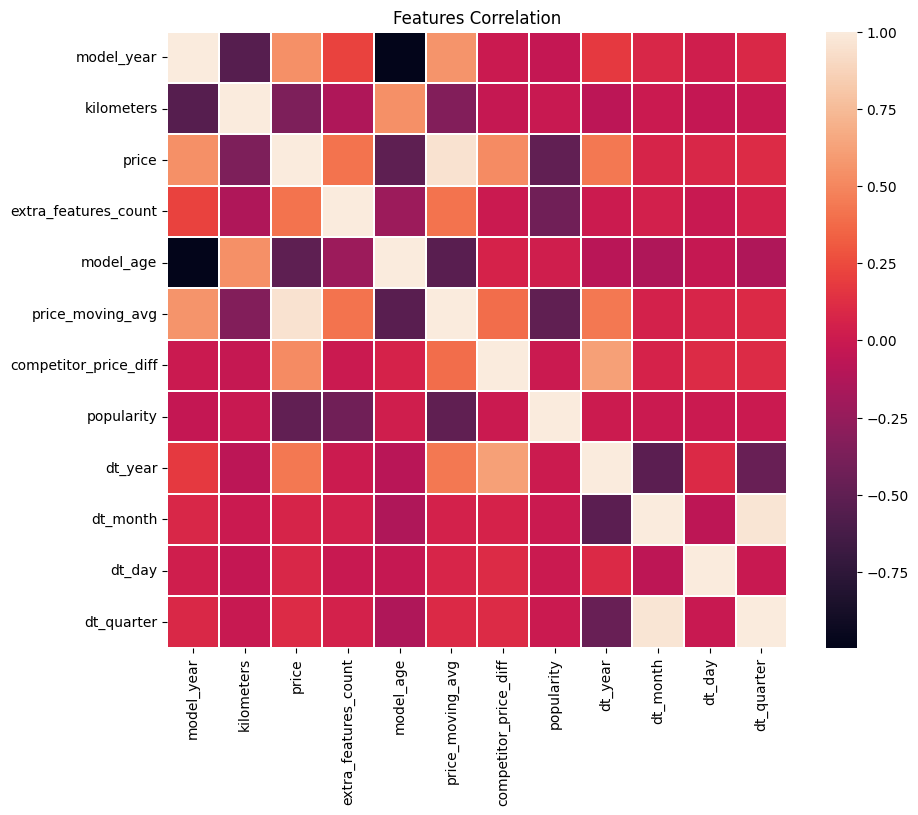

In [58]:
_, ax = plt.subplots(figsize =(10,8)) 
sns.heatmap(corr_matrix,ax = ax, linewidths = 0.1)
plt.title('Features Correlation')
plt.savefig('../report/plots/correlation.jpg')
plt.show()

In [59]:
# Simplify by emptying all the data below the diagonal
# np.tril_indices_from will return the indecies diagonal and below (lower triangle)
tril_index = np.tril_indices_from(corr_matrix)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_matrix.iloc[coord[0], coord[1]] = np.NaN

# Stack the data and convert to a dataframe
corr_values = (corr_matrix
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [60]:
corr_values.head()

,feature1,feature2,correlation,abs_correlation
0,model_year,kilometers,-0.544415,0.544415
1,model_year,price,0.543753,0.543753
2,model_year,extra_features_count,0.219730,0.219730
3,model_year,model_age,-0.995784,0.995784
4,model_year,price_moving_avg,0.563351,0.563351


[Text(0.5, 0, 'Absolute Correlation'), Text(0, 0.5, 'Frequency')]

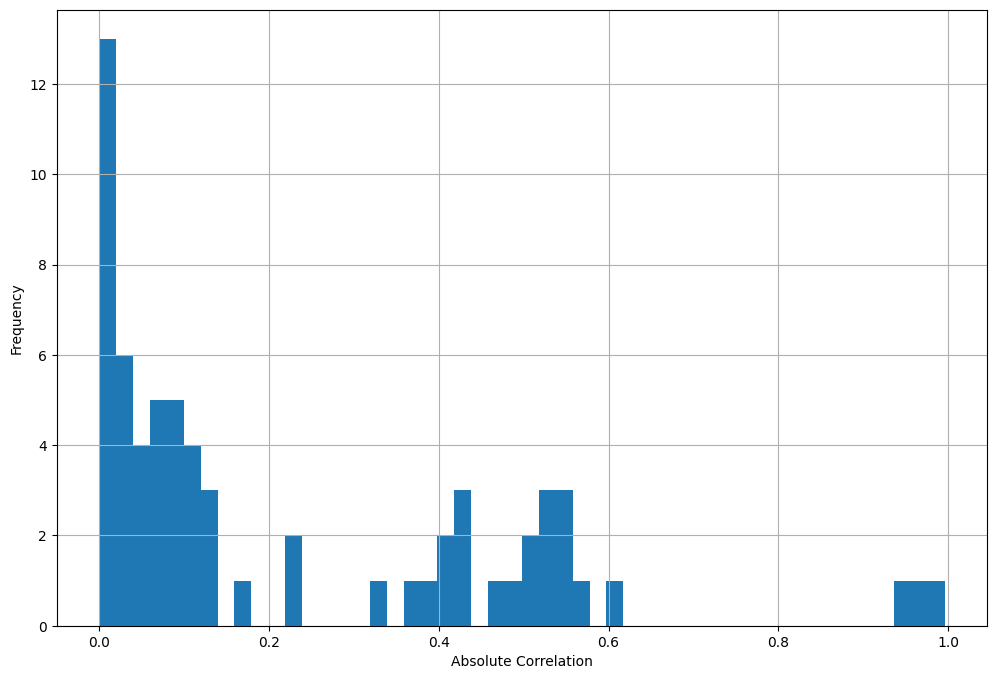

In [61]:
ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency')

In [62]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
64,dt_month,dt_quarter,0.967226,0.967226
23,price,price_moving_avg,0.950963,0.950963
3,model_year,model_age,-0.995784,0.995784


## Save dataset

In [63]:
df.to_csv('../data/intermid/DS-task-data-processed.csv', index=False)